In [1]:
# Importing pandas and seaborn libraries for data manipulation and charting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data from CSV file
data = pd.read_excel('churn_clean_rf_V2.xlsx')

In [3]:
# Function to clean column names

def column_name_remove_space(data):
    for x in data.columns:
        if " " in x:
            data = data.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return data

In [4]:
# Check for null values
data.isna().any(axis=0).any()

False

In [5]:
# Following columns have categorical data types and they need to be converted to dummy variables
dummy_variable_columns =['GENDER','BILLING_PLATFORM','HAS_FREE_TRIAL','SUBSCRIPTION_PERIOD','BY_CAMPAIGN',
                         'Tablet','SUBSCRIPTION_TYPE','HAS_ANY_KIDS_PROFILE_STREAMING','PRODUCT_SWITCH','IS_RECONNECT_PAID_TO_PAID','IS_RECONNECT_PAID_TO_TRIAL',
                         'IS_RECONNECT_TRIAL_TO_PAID','IS_RECONNECT_TRIAL_TO_TRIAL','STREAM_SPORTS','STREAM_SERIES',
                         'STREAM_MOVIES','PAYMENT_METHOD','PURCHASE_DEVICE_TYPE', 'CHURN']


dummy_data_file_index = 0

In [6]:
# Starting with imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [7]:
#Convertin the predictor variable in a binary numeric variable
data['CHURN'].replace(to_replace='Yes', value=1, inplace=True)
data['CHURN'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(data)
#df_dummies.head()

In [8]:
# We will use the data frame where we had created dummy variables
y = df_dummies['CHURN'].values
X = df_dummies.drop(columns = ['CHURN'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8855


<AxesSubplot:>

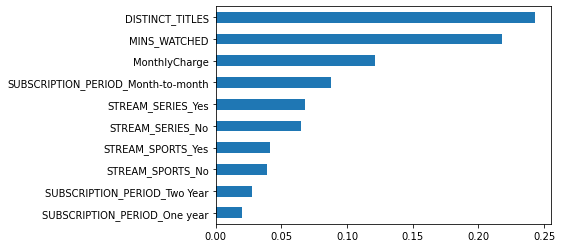

In [10]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [15]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction_test)
mse

0.1145

In [16]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

test_score = r2_score(y_test, prediction_test)
spearman = spearmanr(y_test, prediction_test)
pearson = pearsonr(y_test, prediction_test)

print(f'Out-of-bag R-2 score estimate: {model_rf.oob_score_:>5.3}')    #QUE CHORINGA ES ESTO!!!!
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.877
Test data R-2 score: 0.402
Test data Spearman correlation: 0.687
Test data Pearson correlation: 0.687


In [11]:

# from sklearn import tree
# plt.rcParams.update({'figure.figsize': (30, 9)})
# plt.rcParams.update({'font.size': 300})
# tree.plot_tree(model_rf.estimators_[0], feature_names=X_train.columns, filled=True)
# plt.savefig('tree_high_dpi', dpi=300)

In [ ]:
# print (len(model_rf.estimators_))
# for md in model_rf.estimators_:
#     print(md.score(X_test, y_test), '|',md.get_depth())

In [13]:
import numpy as np
 
importances = model_rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df_dummies.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) DISTINCT_TITLES                0.242868
 2) MINS_WATCHED                   0.217822
 3) MonthlyCharge                  0.121229
 4) SUBSCRIPTION_PERIOD_Month-to-month 0.087702
 5) STREAM_SERIES_Yes              0.067721
 6) STREAM_SERIES_No               0.065216
 7) STREAM_SPORTS_Yes              0.041573
 8) STREAM_SPORTS_No               0.038887
 9) SUBSCRIPTION_PERIOD_Two Year   0.027235
10) SUBSCRIPTION_PERIOD_One year   0.020076
11) PRODUCT_SWITCH_No              0.010866
12) PRODUCT_SWITCH_Yes             0.010691
13) SUBSCRIPTION_TYPE_Combo        0.009023
14) SUBSCRIPTION_TYPE_Standalone   0.004776
15) CHURN                          0.003970
16) CHILDREN                       0.003560
17) HAS_FREE_TRIAL_No              0.002987
18) HAS_FREE_TRIAL_Yes             0.002920
19) DAYS_STREAM                    0.002567
20) DEVICE_COUNT                   0.001999
21) Income                         0.001529
22) AGE_IN_MONTHS                  0.001344
23) IS_RECONNECT_PAID_TO_TRI

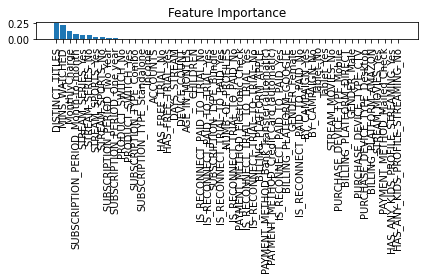

In [14]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()